In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
import astropy.cosmology as cosmo
import pylab as pyl
import time
import pandas as pd
import matplotlib.ticker as ticker
import sys
sys.path.insert(0, '/Users/arielamaral/RM/')
from RMtools_1D.cl_RMsynth_1d import run_rmsynth

In [2]:
pwd = '/Users/arielamaral/Documents/Thesis/POSSUM/POSSUM_sims/'

#POSSUM high band

#possum_band_min = 1152. #MHz

#possum_band_max = 1440. #MHz

#EMU BAND

possum_band_min = 800 #MHz

possum_band_max = 1088 #MHz

sampling_rate = 1. #MHz

possum_freq = np.arange(possum_band_min,possum_band_max,sampling_rate) #MHz spacing between each channel

possum_freq_units = possum_freq*u.MHz
possum_lambda = possum_freq_units.to(u.meter, equivalencies=u.spectral())

We use the following Burn law (first defined in Burn 1966) to define the fractional polarization (depolarization) of our simulated sources):

$$ p(\lambda) = p_0 \exp{\left(\psi_0 + \lambda^2 RM_0\right)} \exp{\left(- \sigma_{RM}^2 \lambda^4\right)} + \mathrm{Noise} $$

In [3]:
def burn_law(p_0,sigma_rm,lamda,psi_0,RM_0,noise_lvl):#,flux):
    noise_array = np.random.normal(0., noise_lvl, len(lamda)) +np.random.normal(noise_lvl, noise_lvl, len(lamda))*1j
    #frac_noise_array = noise_array/flux
    p = p_0*np.exp(-1* sigma_rm**2. * lamda**4.)*np.exp(2j*(psi_0 + lamda**2. * RM_0)) + noise_array#frac_noise_array
    return p,noise_array

In [4]:
def intensity_SI(freq_array,flux,SI):
    f_0 = np.mean((freq_array[0],freq_array[-1]))
    I_f = flux * ((freq_array/(f_0))**(SI))
    return I_f

In [5]:
def double_peak(p1,p2,lamda,psi1,psi2,delta_RM,noise_lvl,flux):
    RM1 = 45.
    RM2 = RM1-delta_RM
    noise_array = np.random.normal(0., noise_lvl, len(lamda)) +np.random.normal(noise_lvl, noise_lvl, len(lamda))*1j
    frac_noise_array = noise_array/flux
    Ptot = p1*np.exp(2j*(psi1 + lamda**2. * RM1)) + p2*np.exp(2j*(psi2 + lamda**2. * RM2)) + frac_noise_array
    return Ptot,frac_noise_array

# Simple Sources with non-varying noise (0.01 fractional noise)

In [6]:
num_sources = 1000

##########################################
#PARAMETERS THAT CAN BE CHANGED
p_0 = 0.3 #30% polarized - going to keep this the same for all sources

psi_0 = 0.
RM_0 = 50. #Rotation measure, rad/m^2

noise_lvl = np.zeros(num_sources)+0.001
    

#changing parameters
delta_funcs =np.zeros(50)
non_zero = int(num_sources - len(delta_funcs))
sigma_rm = np.concatenate((delta_funcs,np.linspace(0,145,non_zero))) #this is the spread in the RM

In [7]:
sigmaAddU = np.zeros(num_sources)

sigmaAddQ = np.zeros(num_sources)

dSigmaAddMinusQ = np.zeros(num_sources)

dSigmaAddPlusQ = np.zeros(num_sources)

dSigmaAddMinusU = np.zeros(num_sources)

dSigmaAddPlusU = np.zeros(num_sources)

snrPIchan = np.zeros(num_sources)



for i in np.arange(0,num_sources):
    p,noise_array = burn_law(p_0,sigma_rm[i],possum_lambda.value,psi_0,RM_0,noise_lvl[i])

    possum_freq_Hz = possum_freq*1000000.
    q = np.real(p)
    u = np.imag(p)
    if noise_lvl[i] == 0.:
        print('Zero noise!')
        dq = np.zeros(len(np.real(p))) +1.
        du = np.zeros(len(np.real(p))) +1.
    elif noise_lvl[i] != 0.:
        dq = np.real(noise_array)
        du = np.imag(noise_array)

    data = np.c_[possum_freq_Hz,q,u,dq,du].T

    RM_output = run_rmsynth(data,verbose=False)


    sigmaAddU[i] = RM_output[0]['sigmaAddU']

    sigmaAddQ[i] = RM_output[0]['sigmaAddQ']
    
    
    dSigmaAddMinusQ[i] = RM_output[0]['dSigmaAddMinusQ']
    dSigmaAddPlusQ[i]= RM_output[0]['dSigmaAddPlusQ']

    dSigmaAddMinusU[i] = RM_output[0]['dSigmaAddMinusU']
    dSigmaAddPlusU[i] = RM_output[0]['dSigmaAddPlusU']
    
    #ADD THE SNR AS AN OUTPUT HERE
    snrPIchan[i] = RM_output[0]['snrPIchan']



Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no

Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no

Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no

Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no

In [8]:
#Defining Sigma Add Total:
sigmaAdd = sigmaAddQ + sigmaAddU

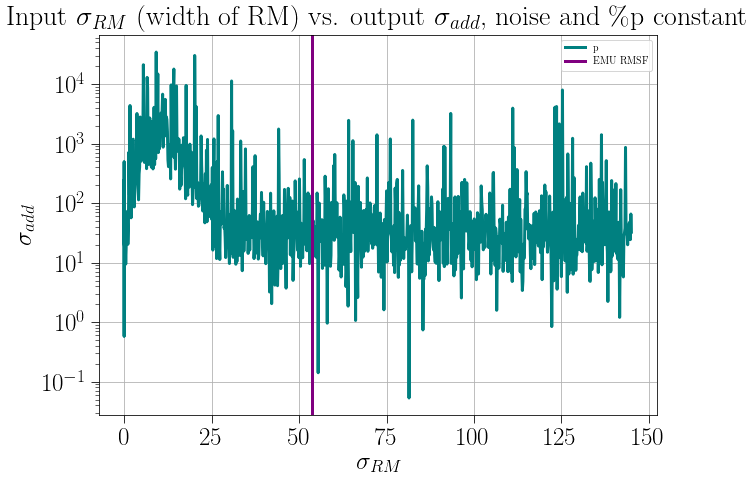

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(10,7))
plt.title(r"Input $\sigma_{RM}$ (width of RM) vs. output $\sigma_{add}$, noise and \%p constant",fontsize=28)
plt.plot(sigma_rm,sigmaAdd,linewidth=3,color='teal',label='p')
plt.xlabel(r"$\sigma_{RM}$",fontsize=25)
plt.ylabel(r"$\sigma_{add}$",fontsize=25)
plt.axvline(x=53.82,linewidth=3,color='purple',label='EMU RMSF')
plt.grid()
plt.yscale('log')
plt.tick_params(labelsize=25)
plt.legend()
plt.show()

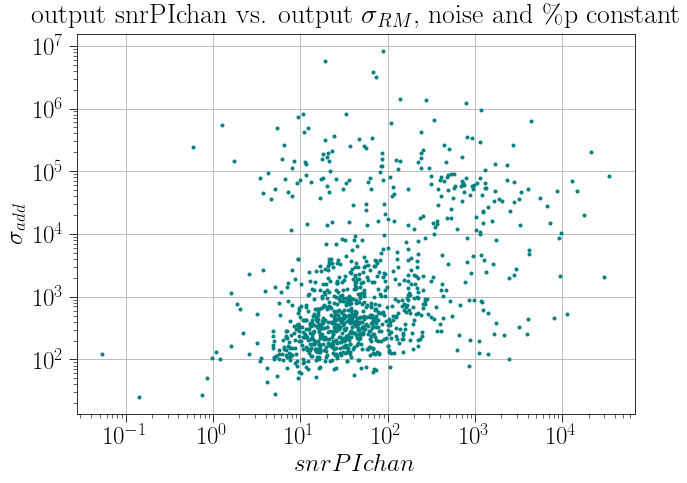

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(10,7))
plt.title(r"output snrPIchan vs. output $\sigma_{RM}$, noise and \%p constant",fontsize=28)
plt.plot(sigmaAdd,snrPIchan,'.',linewidth=3,color='teal',label='p')
plt.xlabel(r"$snrPIchan$",fontsize=25)
plt.ylabel(r"$\sigma_{add}$",fontsize=25)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.tick_params(labelsize=25)
plt.show()

# Simple Sources with a Sigma RM (width)

In [11]:
num_sources = 1000

##########################################
#PARAMETERS THAT CAN BE CHANGED
p_0 = 0.3 #70% polarized - going to keep this the same for all sources
#noise_lvl = 0.00 #mJy?? need to figure out units here but I'm pretty sure this is correct
psi_0 = 0.
RM_0 = 50. #Rotation measure, rad/m^2

N_cycle = 5.

noise_lvl_small = np.logspace(-7.,-1.,num_sources/N_cycle) #in fractional noise units!

noise_lvl = np.array([])
for i in np.arange(0,N_cycle):
    noise_lvl = np.concatenate((noise_lvl,noise_lvl_small))
    

#changing parameters
delta_funcs =np.zeros(50)
non_zero = int(num_sources - len(delta_funcs))
sigma_rm = np.concatenate((delta_funcs,np.linspace(0,145,non_zero))) #this is the spread in the RM
#print(sigma_rm)

In [12]:
sigmaAddU = np.zeros(num_sources)

sigmaAddQ = np.zeros(num_sources)

dSigmaAddMinusQ = np.zeros(num_sources)

dSigmaAddPlusQ = np.zeros(num_sources)

dSigmaAddMinusU = np.zeros(num_sources)

dSigmaAddPlusU = np.zeros(num_sources)

snrPIchan = np.zeros(num_sources)



for i in np.arange(0,num_sources):
    p,noise_array = burn_law(p_0,sigma_rm[i],possum_lambda.value,psi_0,RM_0,noise_lvl[i])

    possum_freq_Hz = possum_freq*1000000.
    q = np.real(p)
    u = np.imag(p)
    if noise_lvl[i] == 0.:
        print('Zero noise!')
        dq = np.zeros(len(np.real(p))) +1.
        du = np.zeros(len(np.real(p))) +1.
    elif noise_lvl[i] != 0.:
        dq = np.real(noise_array)
        du = np.imag(noise_array)

    data = np.c_[possum_freq_Hz,q,u,dq,du].T

    RM_output = run_rmsynth(data,verbose=False)


    sigmaAddU[i] = RM_output[0]['sigmaAddU']

    sigmaAddQ[i] = RM_output[0]['sigmaAddQ']
    
    
    dSigmaAddMinusQ[i] = RM_output[0]['dSigmaAddMinusQ']
    dSigmaAddPlusQ[i]=RM_output[0]['dSigmaAddPlusQ']

    dSigmaAddMinusU[i] = RM_output[0]['dSigmaAddMinusU']
    dSigmaAddPlusU[i] = RM_output[0]['dSigmaAddPlusU']
    
    #ADD THE SNR AS AN OUTPUT HERE
    snrPIchan[i] = RM_output[0]['snrPIchan']


    


Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no

Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no

Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no

Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no Stokes I data in use.
Warn: no

In [13]:
#now let's define SigmaAdd total:
sigmaAdd = sigmaAddQ + sigmaAddU

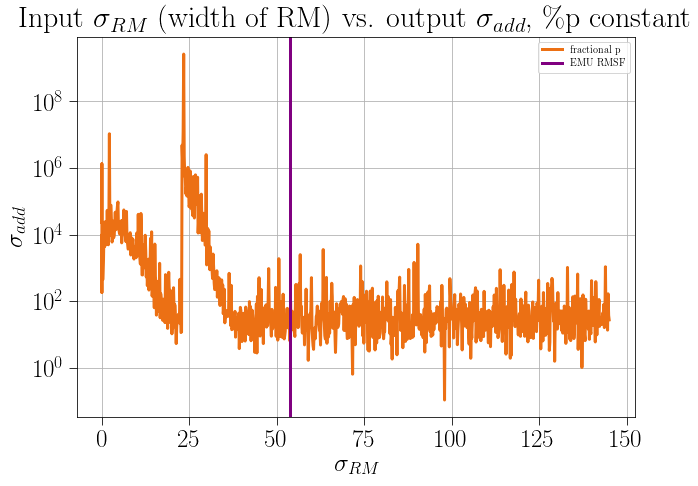

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(10,7))
plt.title(r"Input $\sigma_{RM}$ (width of RM) vs. output $\sigma_{add}$, \%p constant",fontsize=30)
plt.plot(sigma_rm,sigmaAdd,linewidth=3,color='#ec7014',label='fractional p')
plt.xlabel(r"$\sigma_{RM}$",fontsize=25)
plt.ylabel(r"$\sigma_{add}$",fontsize=25)
plt.axvline(x=53.82,linewidth=3,color='purple',label='EMU RMSF')
plt.grid()
plt.yscale('log')
plt.legend()
plt.tick_params(labelsize=25)
plt.show()

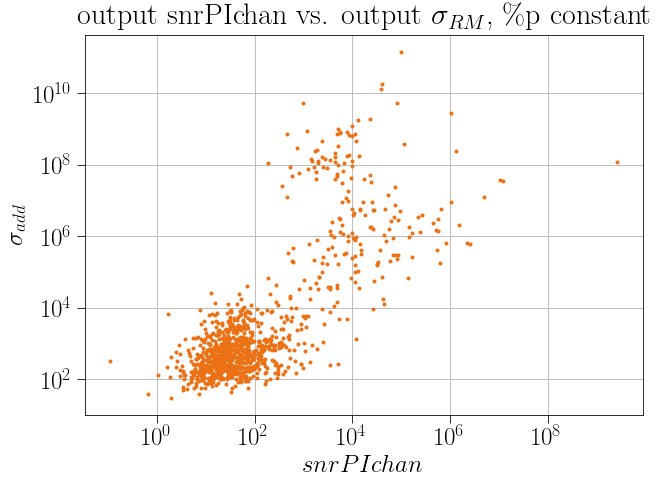

In [15]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(10,7))
plt.title(r"output snrPIchan vs. output $\sigma_{RM}$, \%p constant",fontsize=30)
plt.plot(sigmaAdd,snrPIchan,'.',linewidth=3,color='#ec7014',label='p')
plt.xlabel(r"$snrPIchan$",fontsize=25)
plt.ylabel(r"$\sigma_{add}$",fontsize=25)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.tick_params(labelsize=25)
plt.show()